## 1. 데이터 및 피처 확인


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


피처 정보

* fixed acidity 산도

* volatile acidity 휘발성산

* citric acid 시트르산

* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분

* chlorides 염화물

* free sulfur dioxide 독립 이산화황

* total sulfur dioxide 총 이산화황

* density 밀도

* pH 수소이온농도

* sulphates 황산염

* alcohol 도수

* type 종류



In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


* 5497개 데이터, 결측치 없음

## 2. 데이터 전처리

In [7]:
# 불필요한 피처(index) 제거
train.drop(['index'], axis=1, inplace=True)
test.drop(['index'], axis=1,inplace=True)

In [8]:
# 라벨인코딩: type

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train['type']=le.fit_transform(train['type'])
test['type']=le.fit_transform(test['type'])

## 3 EDA

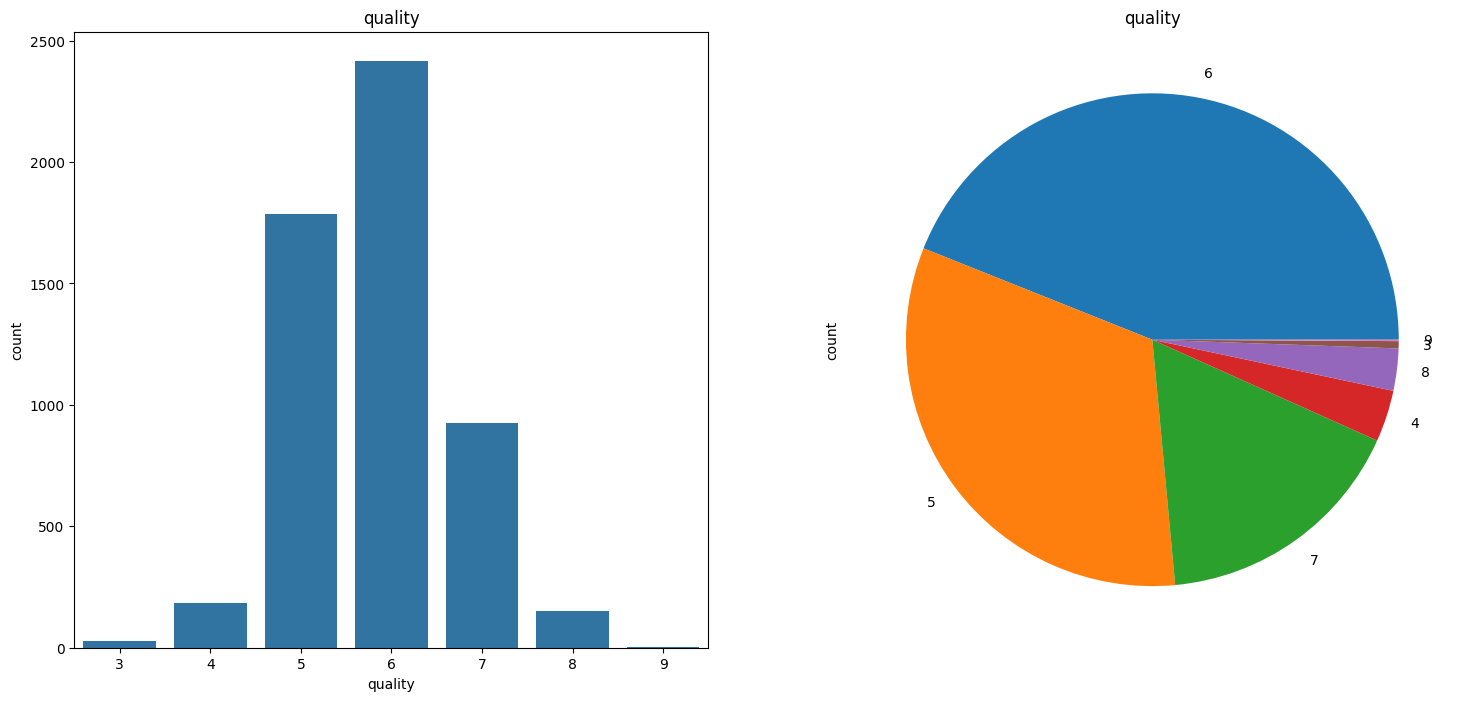

In [93]:
# 품질 분포 확인

f,ax=plt.subplots(1,2,figsize=(18,8))
train['quality'].value_counts().plot.pie(ax=ax[1])
ax[0].set_title('quality')
ax[0].set_ylabel('')
sns.countplot(x='quality',data=train,ax=ax[0])
ax[1].set_title('quality')
plt.show()

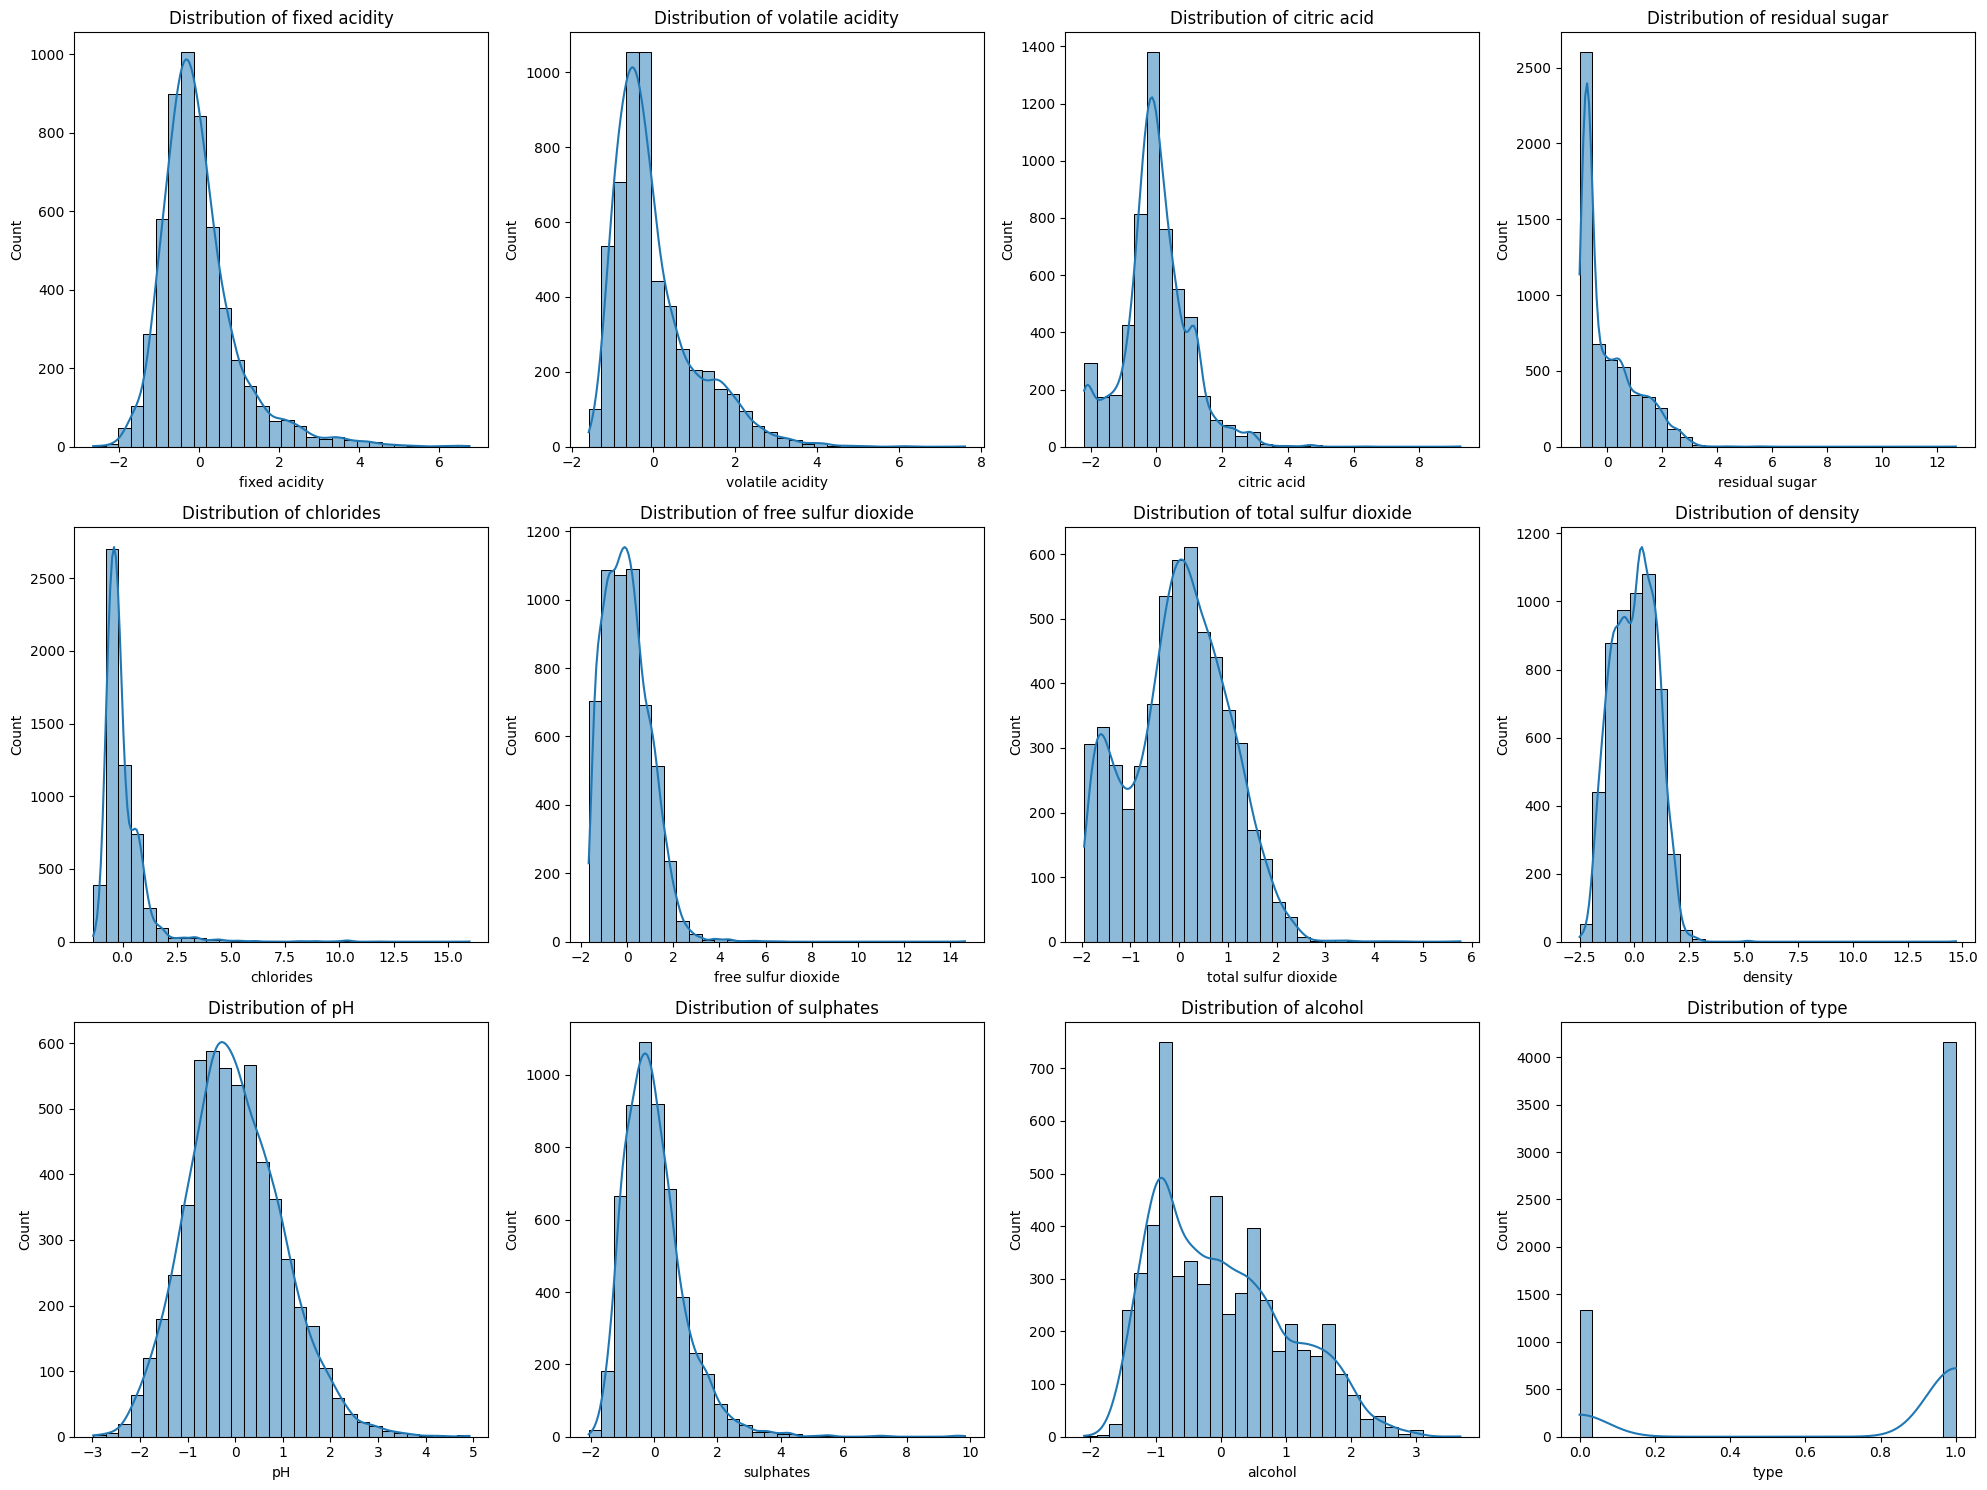

In [94]:
# 각 피처들 분포

def plot_feature_distributions(df):
    features = df.drop(['quality'], axis=1).columns
    plt.figure(figsize=(20, 15))

    for i, col in enumerate(features):
        plt.subplot(3, 4, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_feature_distributions(train)

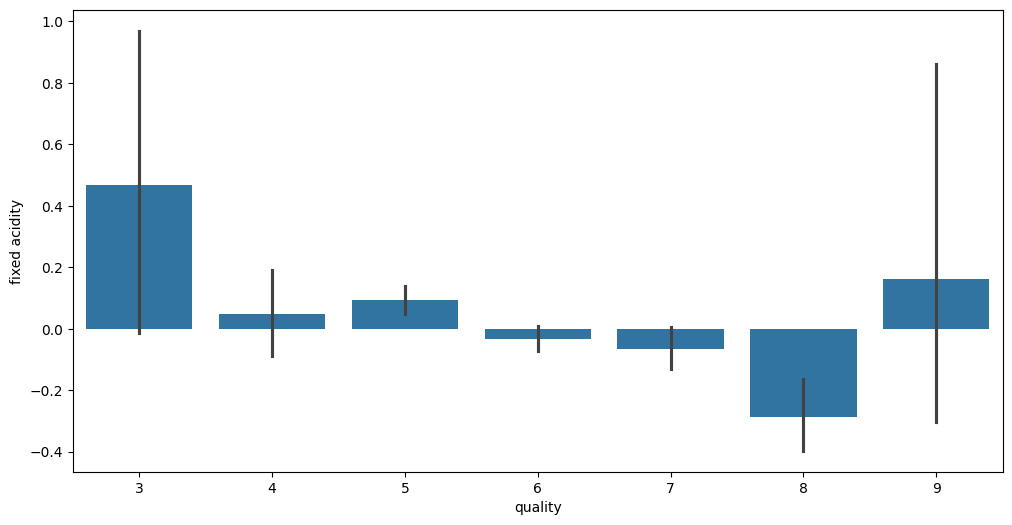

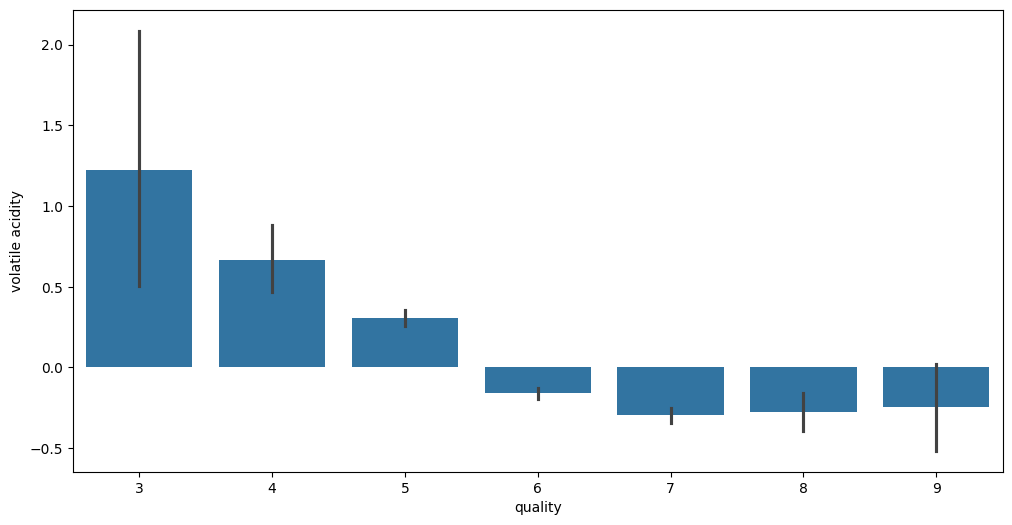

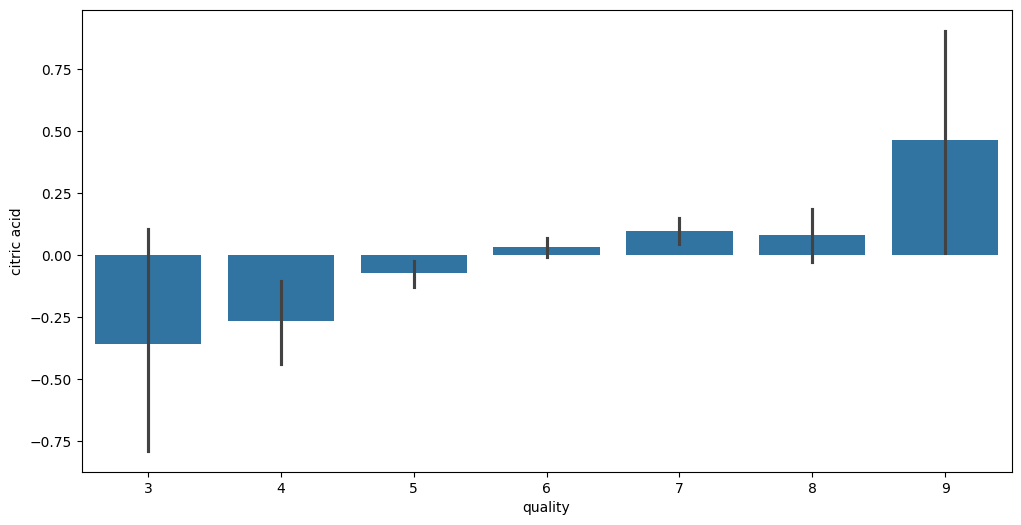

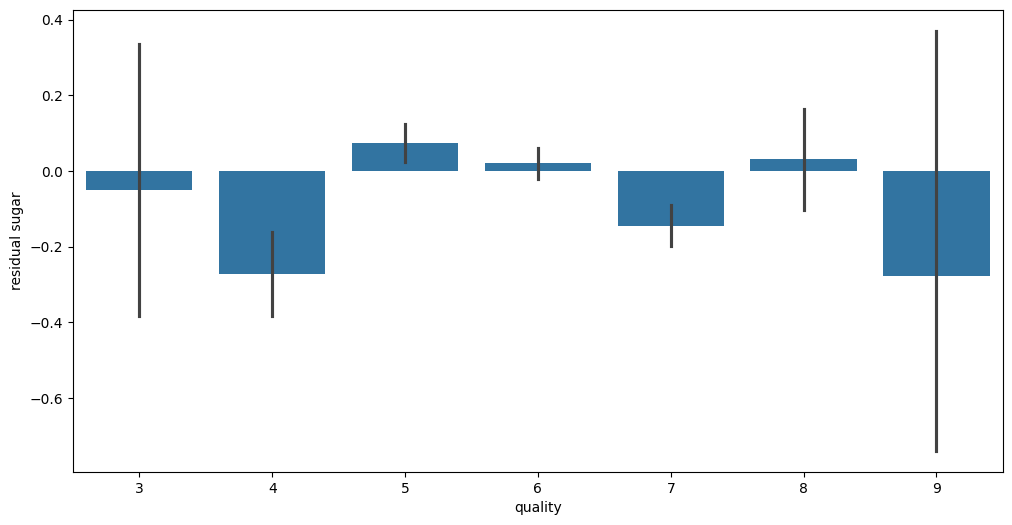

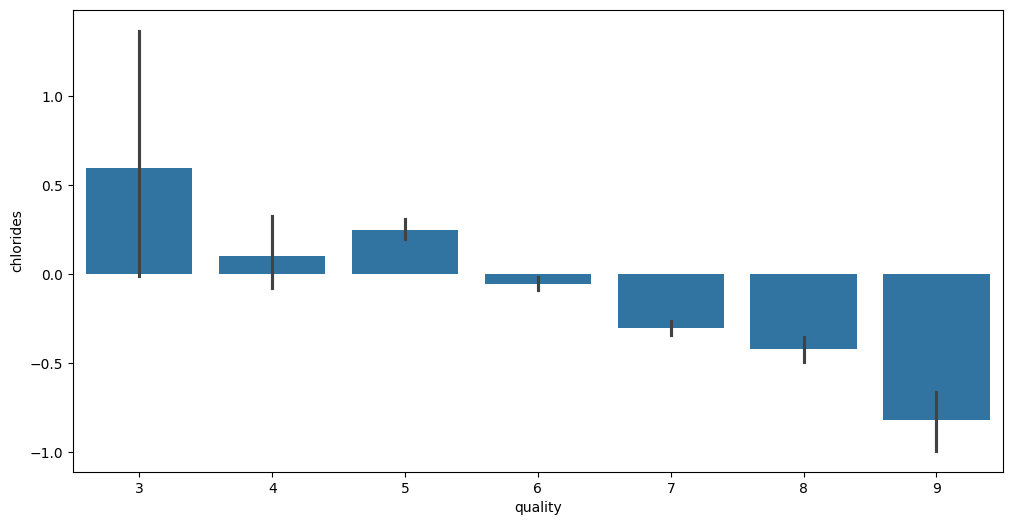

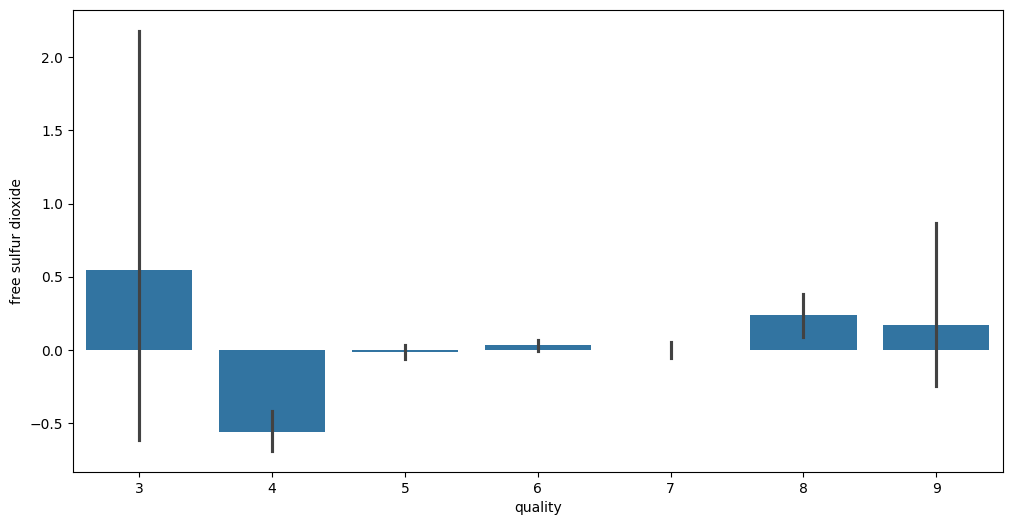

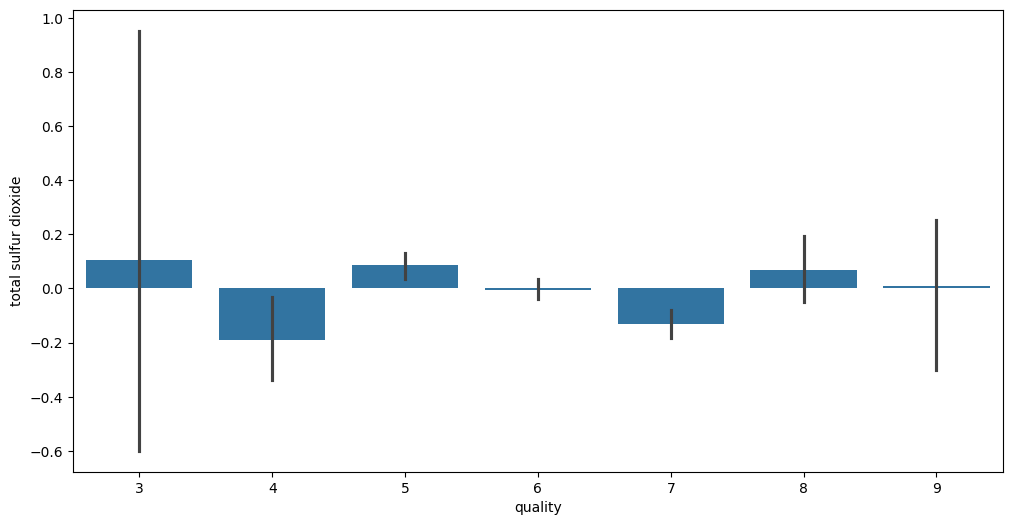

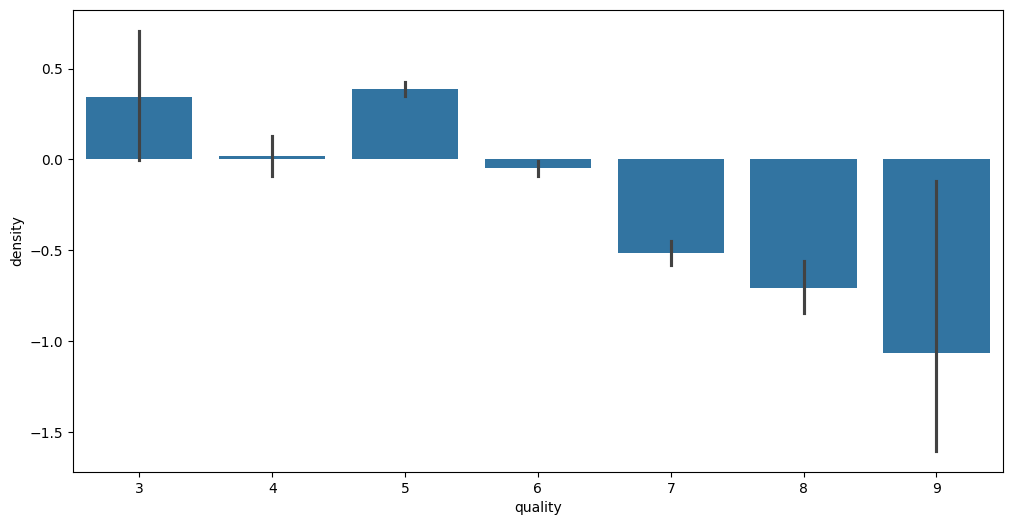

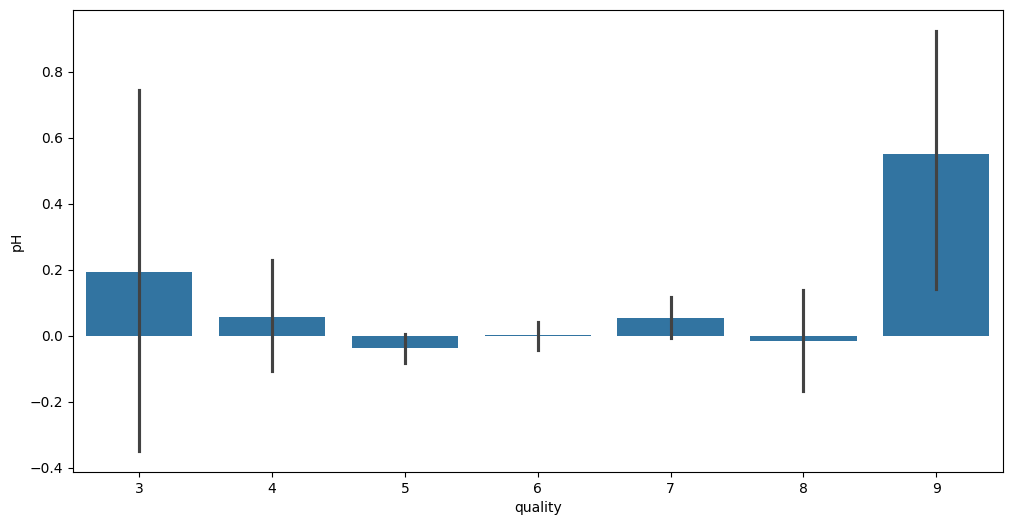

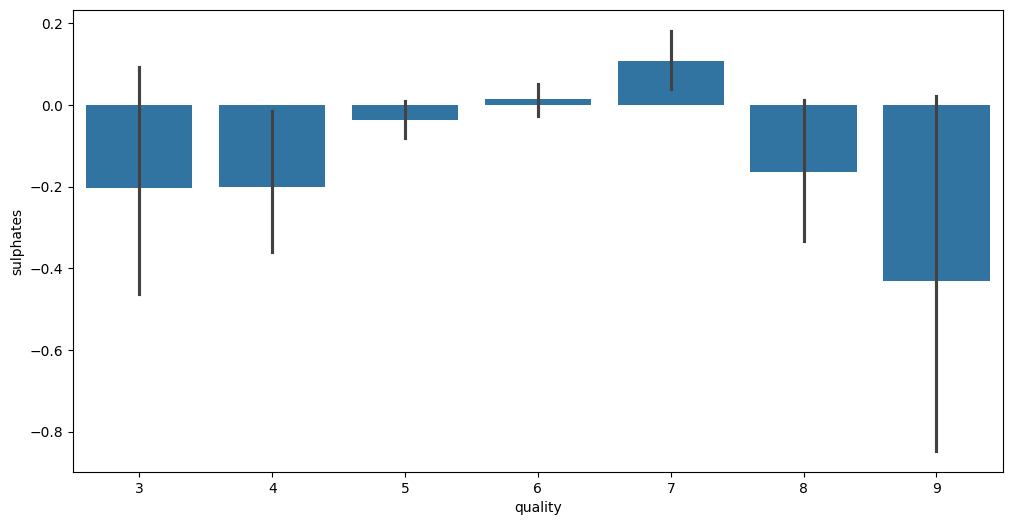

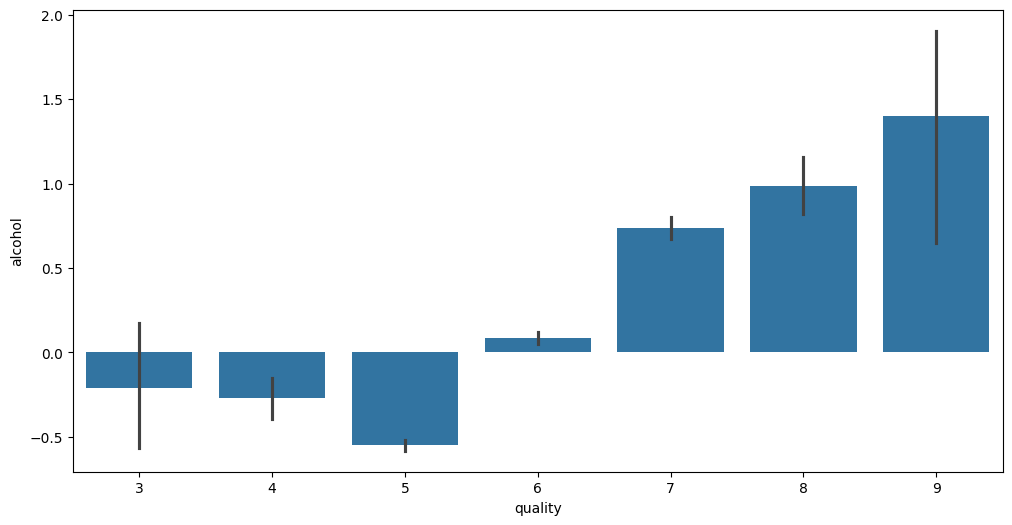

In [95]:
# 각 피처별 퀄리티 분포

for i in range(11):
  fig=plt.figure(figsize=(12,6))
  sns.barplot(x='quality',y=train.columns[i+1],data=train)

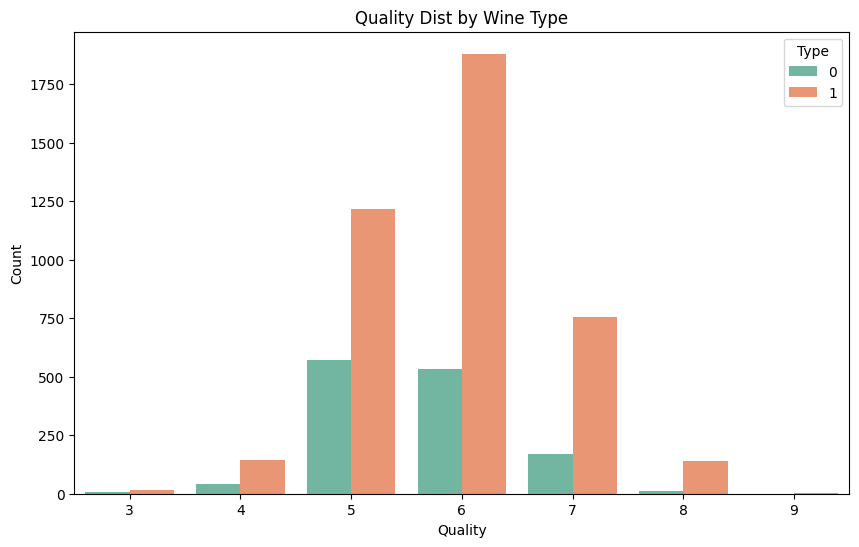

In [96]:
# Type에 따른 품질
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='quality', hue='type', palette='Set2')
plt.title('Quality Dist by Wine Type')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

- red와 white의 분포가 유사함
  - 샘플의 수는 불균형하지만 분포가 불균형해 보이지는 않으므로 그대로 진행

<Axes: >

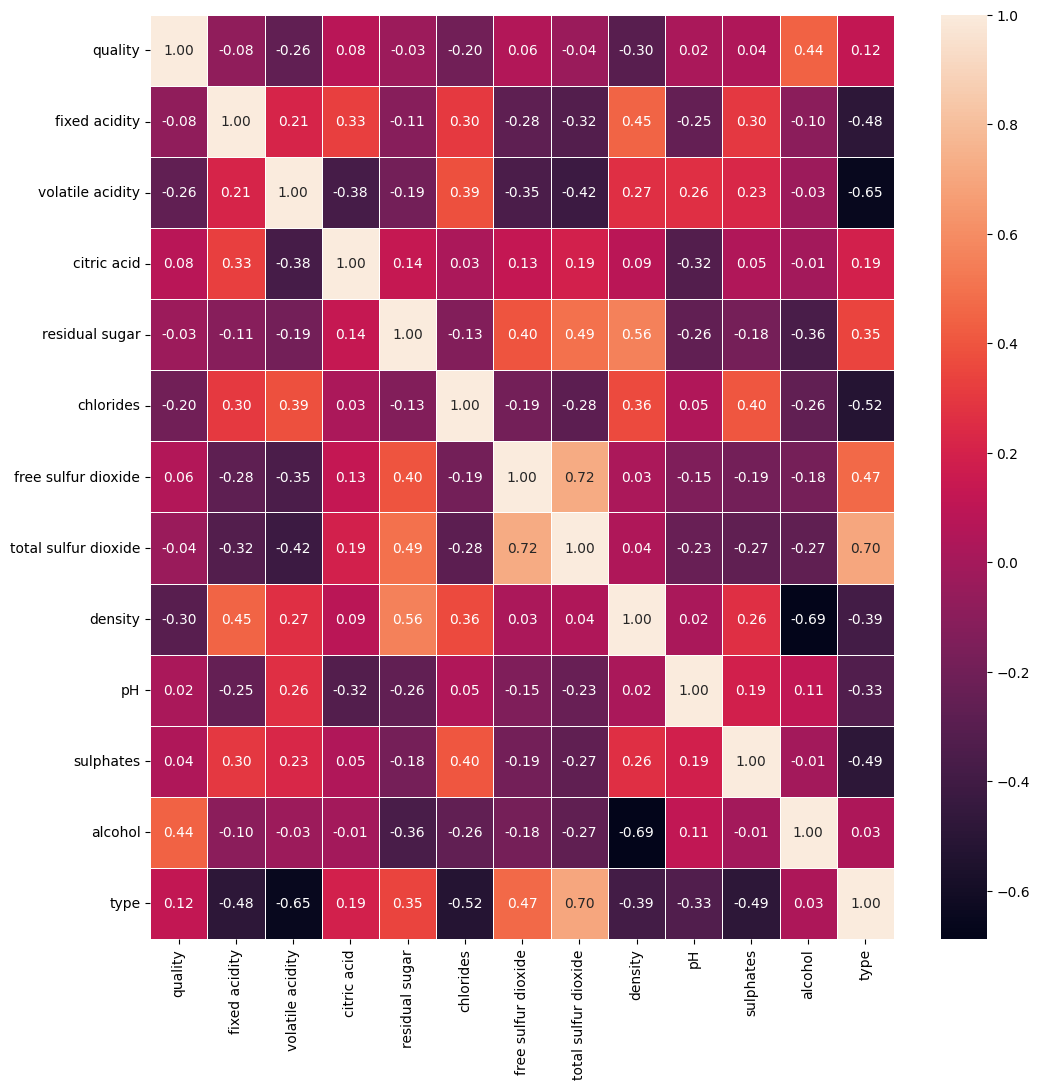

In [97]:
# 피처 간 상관관계 파악

plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5)

## 4. 연속형 피처 표준화

In [9]:
# 표준화
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

continuous_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

train[continuous_cols] = standard_scaler.fit_transform(train[continuous_cols])
test[continuous_cols] = standard_scaler.transform(test[continuous_cols])

# 5. 모델링

In [10]:
import warnings
warnings.filterwarnings('ignore')

## 5-1) 랜덤포레스트

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
X = train.drop(['quality'], axis=1)
y = train['quality']

**<랜덤 포레스트>**

In [13]:
# RF

rf_clf=RandomForestClassifier(random_state=156)
rf_clf.fit(X,y)
y_pred_rf=rf_clf.predict(test)

In [14]:
# RF 최종 예측

rf_clf=RandomForestClassifier(random_state=156)
rf_clf.fit(X,y)
y_pred_rf=rf_clf.predict(test)

점수: 0.686

**<하이퍼 파라미터 튜닝>**

In [ ]:
# GridSearch

from sklearn.model_selection import GridSearchCV

params={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,8,16],
    'min_samples_leaf': [1,5,8]
}

rf_clf_grid=RandomForestClassifier(random_state=156,
                              n_jobs=-1)
grid_cv=GridSearchCV(rf_clf_grid,
                     param_grid=params,
                     cv=5,
                     n_jobs=-1)
grid_cv.fit(X,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=156),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 8, 16],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최고 예측 정확도: 0.6776


In [ ]:
# RF (GridSearch 튜닝) 최종 예측

rf_clf=RandomForestClassifier(max_depth=20,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              n_estimators=300,
                              random_state=156)
rf_clf.fit(X,y)
y_pred_rf=rf_clf.predict(test)

점수: 0.686

In [ ]:
# RandomizedSearch

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': (100,200,300),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

rf_clf_randomized=RandomForestClassifier(random_state=156,
                              n_jobs=-1)

random_search = RandomizedSearchCV(
    rf_clf_randomized, param_distributions=param_dist,
    n_iter=50,  # 전체 조합 중 30개만 시도
    cv=5, n_jobs=-1, random_state=42
)
random_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=156),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c6beabc78d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c6bea75fd50>,
                                        'n_estimators': (100, 200, 300)},
                   random_state=42)

In [ ]:
print('최적 하이퍼 파라미터:\n',random_search.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(random_search.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
최고 예측 정확도: 0.6755


In [ ]:
# RF (RandomizedSearch 튜닝) 최종 예측

rf_clf=RandomForestClassifier(max_depth=None,
                              min_samples_leaf=1,
                              min_samples_split=4,
                              n_estimators=300,
                              random_state=156)
rf_clf.fit(X,y)
y_pred_rf=rf_clf.predict(test)

점수: 0.675

In [ ]:
# Hyperopt

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import numpy as np

# 하이퍼파라미터 탐색 공간 정의
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'max_depth': hp.quniform('max_depth', 3, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),
}

# 목적 함수 정의
def objective(params):
    # 정수형 파라미터 처리
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])

    rf_clf = RandomForestClassifier(**params, random_state=42)
    score = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy').mean()

    return {'loss': -score, 'status': STATUS_OK}

# 탐색 실행
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# 결과 출력
print("\nBest Hyperparameters:")
print(best)

100%|██████████| 50/50 [04:48<00:00,  5.77s/trial, best loss: -0.6785466126230457]

Best Hyperparameters:
{'max_depth': np.float64(20.0), 'min_samples_leaf': np.float64(1.0), 'min_samples_split': np.float64(4.0), 'n_estimators': np.float64(200.0)}


In [ ]:
# RF (Hyperopt 튜닝) 최종예측

rf_clf=RandomForestClassifier(max_depth=20,
                              min_samples_leaf=1,
                              min_samples_split=4,
                              n_estimators=200,
                              random_state=156)
rf_clf.fit(X,y)
y_pred_rf=rf_clf.predict(test)

점수: 0.674

## 5-2) 보팅

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, confusion_matrix

In [16]:
X = train.drop(['quality'], axis=1)
y = train['quality']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

**<개별 모델링>**

In [22]:
# 개별 모델링

rf_clf=RandomForestClassifier(n_estimators=100,random_state=156)
xgb_clf=XGBClassifier(eval_metric='mlogloss')
lgbm_clf=LGBMClassifier(verbose=-1)
lr_clf = LogisticRegression(max_iter=1000)

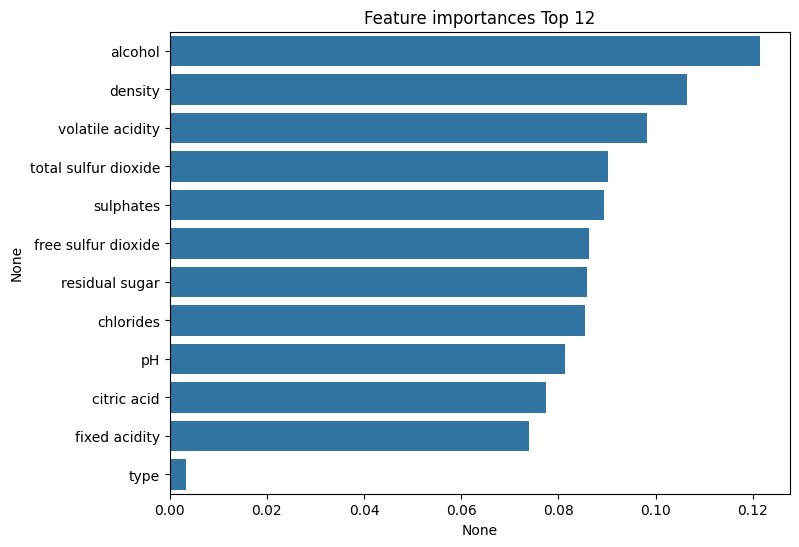

In [18]:
# 피처 중요도 시각화 - rf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rf_clf.fit(X_train, y_train)
rf_importances_values = rf_clf.feature_importances_
rf_importances = pd.Series(rf_importances_values, index=X_train.columns)
rf_top12 = rf_importances.sort_values(ascending=False)[:12]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 12')
sns.barplot(x=rf_top12, y=rf_top12.index)
plt.show()

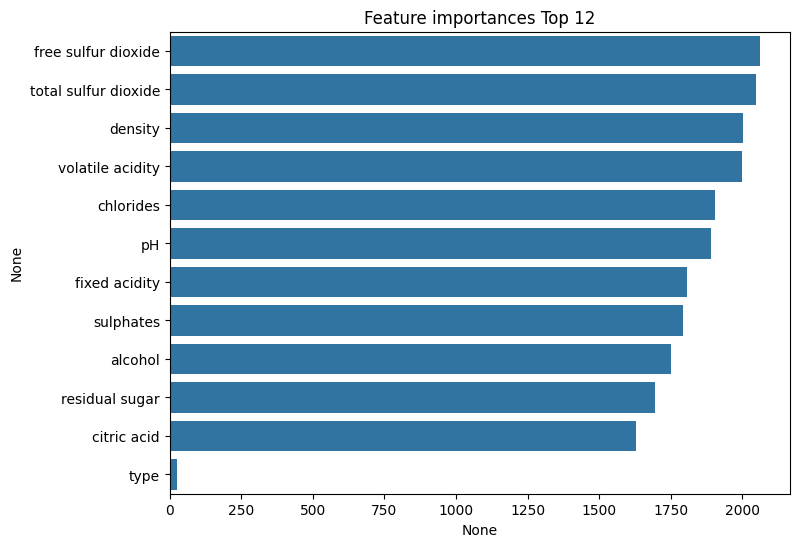

In [23]:
# 피처 중요도 시각화 - lgbm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

lgbm_clf.fit(X_train, y_train)
lgbm_importances_values = lgbm_clf.feature_importances_
lgbm_importances = pd.Series(lgbm_importances_values, index=X_train.columns)
lgbm_top12 = lgbm_importances.sort_values(ascending=False)[:12]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 12')
sns.barplot(x=lgbm_top12, y=lgbm_top12.index)
plt.show()

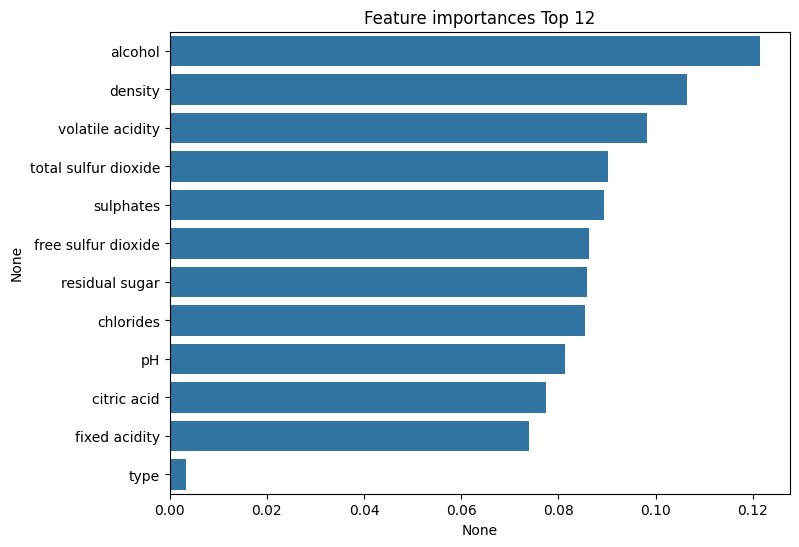

In [29]:
# 피처 중요도 시각화 - xgb
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

xgb_clf.fit(X_train, y_train_encoded)
xgb_importances_values = xgb_clf.feature_importances_
xgb_importances = pd.Series(xgb_importances_values, index=X_train.columns)
xgb_top12 = rf_importances.sort_values(ascending=False)[:12]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 12')
sns.barplot(x=xgb_top12, y=xgb_top12.index)
plt.show()

<ipython-input-36-4fb0feeab600>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_importance', y='feature', data=importance_df.head(12), palette='viridis')


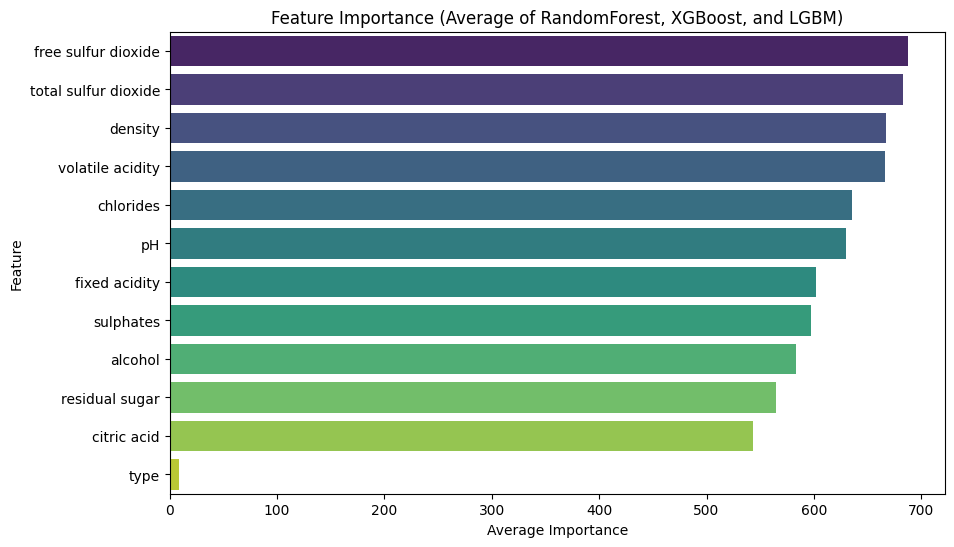

In [ ]:
# 피처 중요도를 데이터프레임으로 정리
feature_names = X_train.columns  # 피처 이름

importance_df = pd.DataFrame({
    'feature': feature_names,
    'RandomForest': rf_importances_values,
    'XGBoost': xgb_importances_values,
    'LGBM': lgbm_importances_values
})

# 각 모델별 피처 중요도 평균
importance_df['mean_importance'] = importance_df[['RandomForest', 'XGBoost', 'LGBM']].mean(axis=1)

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='mean_importance', ascending=False)

# 시각화 (상위 12개 피처)
plt.figure(figsize=(10, 6))
sns.barplot(x='mean_importance', y='feature', data=importance_df.head(12), palette='viridis')
plt.title('Feature Importance (Average of RandomForest, XGBoost, and LGBM)')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()

**<소프트 보팅 수행>**

In [24]:
# <조합 1> RF+LR+XGB+LGBM

voting_clf_1 = VotingClassifier(
    estimators=[
        ('LR', lr_clf),
        ('RF', rf_clf),
        ('XGB', xgb_clf),
        ('LGBM', lgbm_clf)
    ],
    voting='soft'
)

# 학습, 예측
voting_clf_1.fit(X_train, y_train)
val_pred1 = voting_clf_1.predict(X_val)

from sklearn.metrics import accuracy_score
print("검증 정확도:", accuracy_score(y_val, val_pred1))

검증 정확도: 0.6709090909090909


**<추가 개별 모델링>**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
svc_clf = SVC(probability=True)
etc_clf = ExtraTreesClassifier(n_estimators=100, random_state=156)

**<개별 모델 하이퍼 파라미터 튜닝>**

* optuna 사용

In [26]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.3 MB/s eta 0:00:00


In [31]:
optuna.logging.set_verbosity(optuna.logging.CRITICAL)

In [27]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [32]:
# RF

def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }
    model = RandomForestClassifier(**params, random_state=156)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return scores.mean()

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(rf_objective, n_trials=30)
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=156)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=212,
                       random_state=156)

In [33]:
# xgboost

def xgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='mlogloss', random_state=156,verbose=-1)
    scores = cross_val_score(model, X_train, y_train_encoded, cv=3, scoring='accuracy')
    return scores.mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(xgb_objective, n_trials=30)
best_xgb = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=156)
best_xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6204934322085597, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.017300690261430125,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=292, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
# LightGBM

def lgbm_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }
    model = LGBMClassifier(**params, random_state=156,verbose=-1)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return scores.mean()

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(lgbm_objective, n_trials=30)
best_lgbm = LGBMClassifier(**study_lgbm.best_params, random_state=156,verbose=-1)
best_lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.02241389374548416, max_depth=20,
               n_estimators=251, num_leaves=57, random_state=156,
               subsample=0.6125319730559702, verbose=-1)

In [92]:
# LR

def lr_objective(trial):
    # 1) 하이퍼파라미터 탐색 공간
    params = {
        'C': trial.suggest_loguniform('C', 1e-4, 1e2),
        'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet', 'none']),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'saga', 'liblinear']),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'max_iter': 1000
    }
    # elasticnet일 때만 l1_ratio 추가
    if params['penalty'] == 'elasticnet':
        params['l1_ratio'] = trial.suggest_float('l1_ratio', 0.0, 1.0)

    try:
        model = LogisticRegression(**params, random_state=42)
        scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
        mean_score = scores.mean()
        return mean_score

    except Exception as e:
        # 에러 기록 후 해당 trial 건너뛰기
        trial.set_user_attr("error", str(e))
        return float('nan')


# 스터디 생성 (maximize) + MedianPruner로 중간에 비효율 trial 중단
study_lr = optuna.create_study(
    direction='maximize',
    pruner=optuna.pruners.MedianPruner()
)

# 최적화 실행: show_progress_bar=True를 주면 진행 상태 바로 확인 가능
study_lr.optimize(
    lr_objective,
    n_trials=30,
    catch=(Exception,),
    show_progress_bar=True
)

# 결과 출력
print("▶︎ Best trial:")
print(f"  Number: {study_lr.best_trial.number}")
print(f"  Params: {study_lr.best_trial.params}")
print(f"  Accuracy: {study_lr.best_trial.value:.4f}")

# 최적 모델 생성
best_lr = LogisticRegression(**study_lr.best_trial.params, max_iter=1000, random_state=156)
best_lr.fit(X_train, y_train)

  0%|          | 0/30 [00:00<?, ?it/s]

▶︎ Best trial:
  Number: 20
  Params: {'C': 28.360185704513796, 'penalty': 'l2', 'solver': 'lbfgs', 'class_weight': None}
  Accuracy: 0.5432


LogisticRegression(C=28.360185704513796, max_iter=1000, random_state=156)

In [36]:
# knn

def knn_objective(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 50),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2)  # p=1: Manhattan, p=2: Euclidean
    }

    model = KNeighborsClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(knn_objective, n_trials=30, show_progress_bar=True)

print("📌 Best KNN params:", study_knn.best_params)
best_knn = KNeighborsClassifier(**study_knn.best_params)
best_knn.fit(X_train, y_train)

  0%|          | 0/30 [00:00<?, ?it/s]

📌 Best KNN params: {'n_neighbors': 47, 'weights': 'distance', 'p': 1}


KNeighborsClassifier(n_neighbors=47, p=1, weights='distance')

**<파라미터 튜닝 후, 소프트 보팅>**

In [ ]:
# <조합 6> RF+XGB+LGBM (tuned)

voting_clf_6 = VotingClassifier(
    estimators=[
        ('RF', best_rf),
        ('XGB', best_xgb),
        ('LGBM', best_lgbm)
    ],
    voting='soft', n_jobs=-1
)

voting_clf_6.fit(X_train, y_train)
val_pred6 = voting_clf_6.predict(X_val)

from sklearn.metrics import accuracy_score
print("검증 정확도:", accuracy_score(y_val, val_pred6))

검증 정확도: 0.6618181818181819


In [ ]:
# <조합 11> RF+KNN+XGB+LF (tuned)

voting_clf_11 = VotingClassifier(
    estimators=[
        ('RF', best_rf),
        ('KNN', best_knn),
        ('XGB', best_xgb),
        ('LR', best_lr)
    ],
    voting='soft', n_jobs=-1
)

voting_clf_11.fit(X_train, y_train)
val_pred11 = voting_clf_11.predict(X_val)

from sklearn.metrics import accuracy_score
print("검증 정확도:", accuracy_score(y_val, val_pred11))

검증 정확도: 0.6618181818181819


**<보팅 최종 예측>**

In [39]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/sample_submission.csv'

In [ ]:
# <조합 6>

voting_submission_6 = pd.read_csv(file_path)

voting_clf_6.fit(X_train, y_train)
voting_preds6 = voting_clf_6.predict(test)

voting_submission_6['quality'] = voting_preds6

점수: 0.678

In [ ]:
# <조합 11>

voting_submission_11 = pd.read_csv(file_path)

voting_clf_11.fit(X_train, y_train)
voting_preds11 = voting_clf_11.predict(test)

voting_submission_11['quality'] = voting_preds11

점수: 0.676

In [40]:
# <조합 1>

voting_submission_1 = pd.read_csv(file_path)

voting_clf_1.fit(X_train, y_train)
voting_preds1 = voting_clf_1.predict(test)

voting_submission_1['quality'] = voting_preds1

점수: 0.673

## 5-3) 스태킹

**<base model에 random_state만 지정해서 수행>**

In [41]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
X_train=train.drop('quality', axis=1)
y_train=train['quality']


# 전체 unique class 목록 확보
classes = sorted(y_train.unique())

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # 내부적으로 0~6로 변환됨

In [43]:
X_tra, X_val, y_tra, Y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=156)

In [59]:
#개별 ML 모델 생성
base_rf=RandomForestClassifier(random_state=156)
base_xgb=XGBClassifier(random_state=156)
base_lgbm=LGBMClassifier(random_state=156,verbose=-1)

#스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
rf_final=RandomForestClassifier(random_state=156)

In [60]:
base_rf.fit(X_tra, y_tra)
base_xgb.fit(X_tra,y_tra)
base_lgbm.fit(X_tra,y_tra)

LGBMClassifier(random_state=156, verbose=-1)

In [61]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [62]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n.iloc[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델의 예측 후 데이터 저장.
        train_fold_pred[valid_index, :]=model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter]=model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

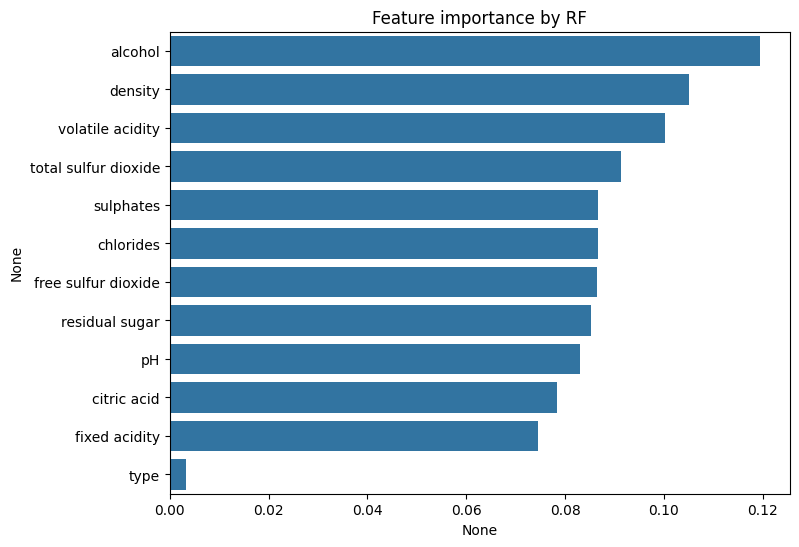

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values=base_rf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importance by RF')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

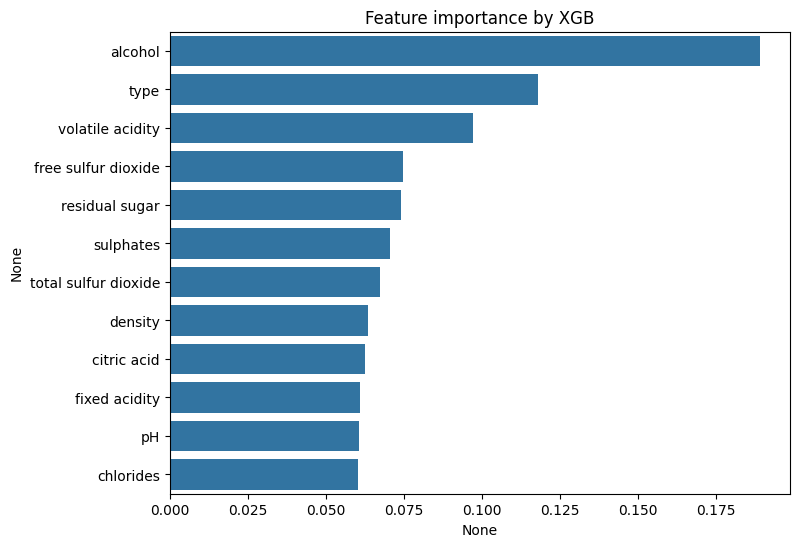

In [64]:
ftr_importances_values=base_xgb.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importance by XGB')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

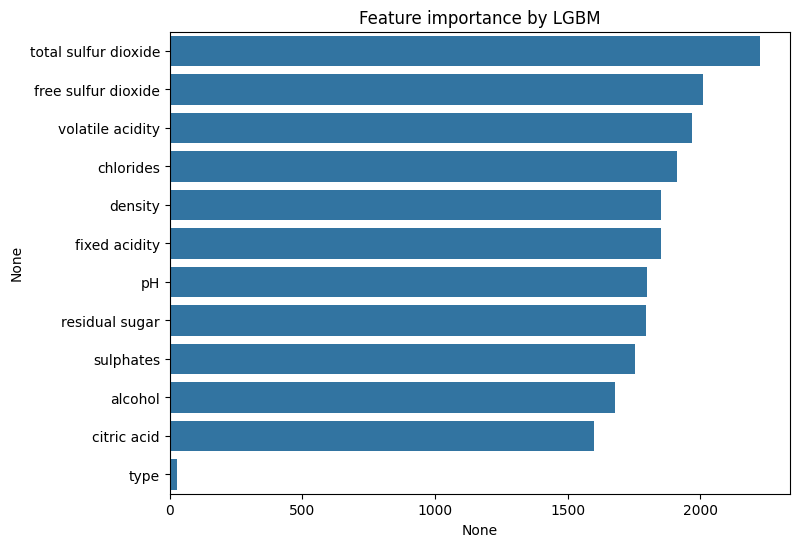

In [65]:
ftr_importances_values=base_lgbm.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importance by LGBM')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

> type이 xgboost에 미치는 영향이 큰것으로 보아서 fitting을 할때에 type을 제거하는게 좋을 것 같다.

In [66]:
X_train_2=train.drop(['quality','type'], axis=1)
y_train_2=train['quality']
X_test_2=test.drop('type', axis=1)

# 전체 unique class 목록 확보
classes = sorted(y_train.unique())

le = LabelEncoder()
y_train_2_encoded = le.fit_transform(y_train_2)

In [67]:
X_tra2, X_val2, y_tra2, Y_val2 = train_test_split(X_train_2, y_train_2_encoded, test_size=0.2, random_state=156)

In [68]:
#개별 ML 모델 생성
base_rf_2=RandomForestClassifier(random_state=156)
base_xgb_2=XGBClassifier(random_state=156)
base_lgbm_2=LGBMClassifier(random_state=156,verbose=-1)

#스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
rf_final_2=RandomForestClassifier(random_state=156)

In [69]:
base_rf_2.fit(X_tra2, y_tra2)
base_xgb_2.fit(X_tra2, y_tra2)
base_lgbm_2.fit(X_tra2, y_tra2)

LGBMClassifier(random_state=156, verbose=-1)

In [70]:
rf_train_2, rf_test_2 = get_stacking_base_datasets(base_rf_2, X_tra2, y_tra2, X_test_2, 5)
xgb_train_2, xgb_test_2 = get_stacking_base_datasets(base_xgb_2, X_tra2, y_tra2, X_test_2, 5)
lgbm_train_2, lgbm_test_2 = get_stacking_base_datasets(base_lgbm_2, X_tra2, y_tra2, X_test_2, 5)

RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
XGBClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
LGBMClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작


In [71]:
Stack_final_X_train_2 = np.concatenate((rf_train_2, xgb_train_2, lgbm_train_2), axis=1)
Stack_final_X_test_2 = np.concatenate((rf_test_2, xgb_test_2, lgbm_test_2), axis=1)
print('원본 학습 피처 데이터 Shape:', X_tra2.shape, '원본 테스트 피처 Shape:', X_test_2.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train_2.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test_2.shape)

원본 학습 피처 데이터 Shape: (4397, 11) 원본 테스트 피처 Shape: (1000, 11)
스태킹 학습 피처 데이터 Shape: (4397, 3) 스태킹 테스트 피처 데이터 Shape: (1000, 3)


In [72]:
rf_final_2.fit(Stack_final_X_train_2, y_tra2)
stack_lgbm_final_2 = rf_final_2.predict(Stack_final_X_test_2)
stack_lgbm_final_2=le.inverse_transform(stack_lgbm_final_2)
print(stack_lgbm_final_2)

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 5 6 6 5 7 6 5 5 5 5 5 7 6 5 5 5 6 5
 5 6 6 6 6 6 5 6 6 5 6 4 6 5 5 6 5 5 6 6 5 5 6 5 6 6 6 6 6 5 5 6 5 5 5 5 6
 6 5 6 6 6 7 6 6 5 5 6 6 5 5 7 6 6 6 6 6 6 7 6 6 6 6 5 6 5 5 6 6 6 6 7 5 6
 6 6 5 5 6 6 7 7 6 6 5 6 7 5 5 6 6 6 7 5 5 5 5 5 6 6 6 5 5 5 5 5 5 5 5 7 6
 7 6 5 8 6 5 6 5 6 6 6 5 5 6 6 6 6 5 6 6 5 6 5 5 6 5 6 6 6 5 6 5 6 6 7 7 5
 6 6 6 5 6 6 6 6 6 6 6 6 5 5 5 6 5 6 6 5 5 6 6 6 6 7 5 5 6 6 6 6 6 6 7 6 5
 6 6 7 6 6 5 6 5 6 7 7 6 6 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 7 6 6 6 7 6
 6 7 5 5 7 5 5 6 5 6 6 6 5 5 5 6 5 7 7 5 6 6 6 6 6 7 7 5 6 6 6 5 5 5 6 5 6
 8 5 5 7 6 6 5 5 6 7 5 7 5 5 6 5 6 5 6 6 5 5 6 6 5 5 6 5 6 6 5 6 6 5 6 7 7
 5 5 6 5 6 6 6 5 6 6 6 5 6 6 6 5 6 5 6 5 6 6 5 6 6 6 6 5 5 6 7 6 6 5 5 6 6
 6 6 5 5 6 5 5 6 6 6 7 6 7 6 5 6 6 5 6 6 7 5 7 6 5 6 6 7 7 5 7 5 6 6 6 6 6
 6 6 6 6 6 6 5 6 6 6 6 5 5 7 6 5 6 6 6 6 6 5 5 7 5 5 6 7 6 6 5 5 5 5 7 6 6
 6 6 5 5 5 6 6 6 5 6 6 5 7 6 6 5 6 6 5 6 5 5 6 6 6 5 5 5 5 5 5 6 6 8 7 6 6
 7 6 5 8 5 5 6 5 6 7 6 5 

In [74]:
# Validation 데이터를 위한 stacking 예측
rf_val_train_2, rf_val_test_2 = get_stacking_base_datasets(base_rf_2, X_tra2, y_tra2, X_val2, 5)
xgb_val_train_2, xgb_val_test_2 = get_stacking_base_datasets(base_xgb_2, X_tra2, y_tra2, X_val2, 5)
lgbm_val_train_2, lgbm_val_test_2 = get_stacking_base_datasets(base_lgbm_2, X_tra2, y_tra2, X_val2, 5)

# 각 모델의 테스트 예측 평균값(test_pred_mean)을 사용하여 스태킹 validation 피처 구성
Stack_final_X_val_2 = np.concatenate((rf_val_test_2, xgb_val_test_2, lgbm_val_test_2), axis=1)

# 메타 모델로 예측
val_rf_2 = rf_final_2.predict(Stack_final_X_val_2)
val_rf_2 = le.inverse_transform(val_rf_2)

RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
XGBClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
LGBMClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작


In [75]:
Y_val2=le.inverse_transform(Y_val2)

In [76]:
# 평가
from sklearn.metrics import accuracy_score, f1_score

accuracy = round(accuracy_score(Y_val2, val_rf_2),3)
f1 = round(f1_score(Y_val2, val_rf_2,average='weighted'),3)  # 다중 클래스라면 average 지정 필요
print(accuracy, f1)

0.685 0.668


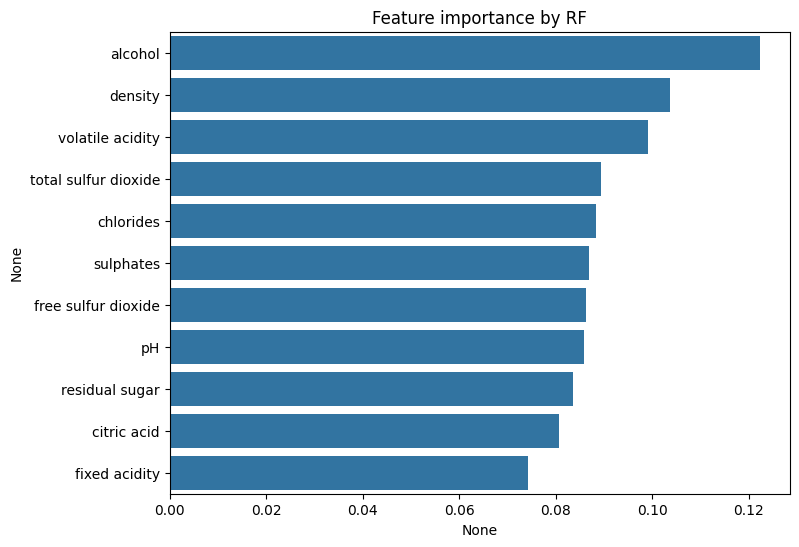

In [77]:
ftr_importances_values=base_rf_2.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_tra2.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importance by RF')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

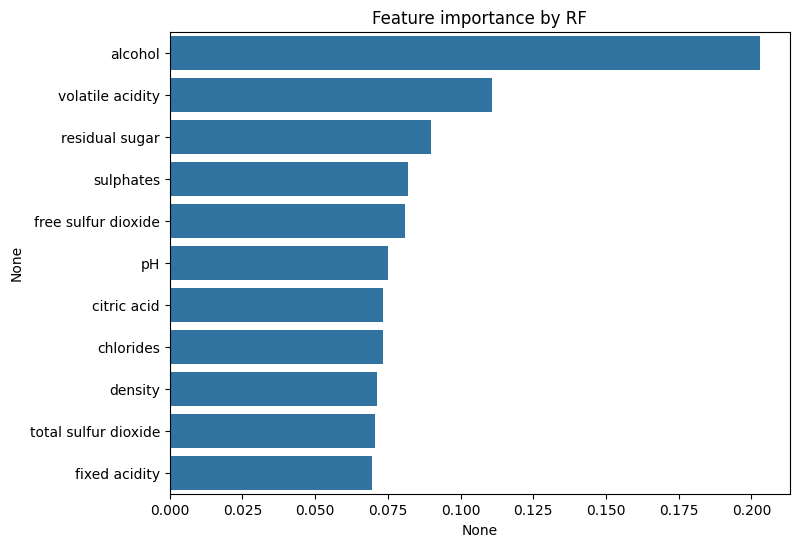

In [78]:
ftr_importances_values=base_xgb_2.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_tra2.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importance by RF')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

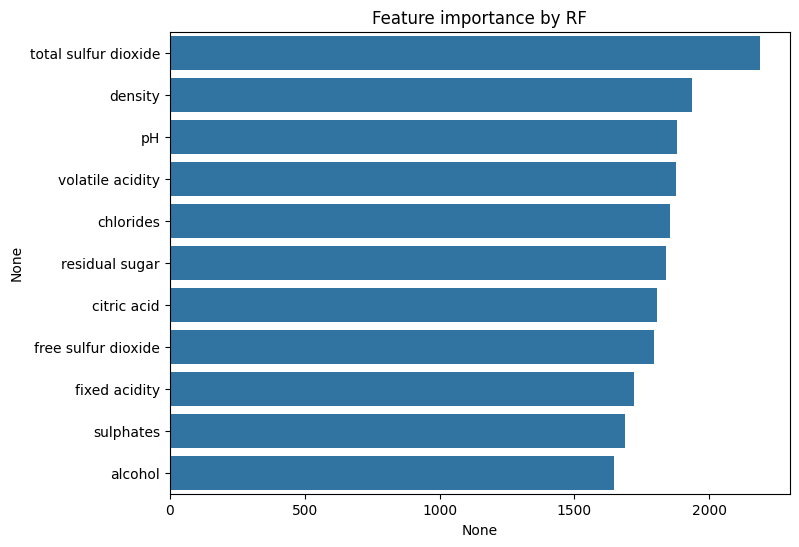

In [79]:
ftr_importances_values=base_lgbm_2.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_tra2.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importance by RF')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

**<basemodel을 gridsearchCV를 이용해서 최적의 모델을 찾아서 대입하기>**

In [58]:
from sklearn.model_selection import GridSearchCV

# 6. 하이퍼파라미터 후보 정의
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 7. GridSearchCV 설정
rf_clf = RandomForestClassifier(random_state=156)
grid_search = GridSearchCV(
    rf_clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 8. 학습
grid_search.fit(X_train, y_train)

# 9. 최적 모델 추출
best_rf = grid_search.best_estimator_
print("최적 하이퍼파라미터:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 하이퍼파라미터: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV 설정
xgb_clf = XGBClassifier(random_state=156)
grid_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train_encoded)

# 최적 모델 평가
print("최적 파라미터:", grid_xgb.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
최적 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [80]:
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 설정
lgbm_clf = LGBMClassifier(random_state=156,verbose=-1)
grid_lgbm = GridSearchCV(lgbm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lgbm.fit(X_train, y_train_encoded)

# 최적 모델 평가
print("최적 파라미터:", grid_lgbm.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
최적 파라미터: {'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.8}


In [81]:
#개별 ML 모델 생성
base_rf_3=RandomForestClassifier(random_state=156,min_samples_leaf=1, min_samples_split=5, n_estimators=200, max_depth=20)
base_xgb_3=XGBClassifier(random_state=156, colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8)
base_lgbm_3=LGBMClassifier(random_state=156, learning_rate=0.1, max_depth=6, subsample=0.8,verbose=-1)

In [82]:
base_rf_3.fit(X_tra2, y_tra2)
base_xgb_3.fit(X_tra2, y_tra2)
base_lgbm_3.fit(X_tra2, y_tra2)

LGBMClassifier(max_depth=6, random_state=156, subsample=0.8, verbose=-1)

In [83]:
rf_train_3, rf_test_3= get_stacking_base_datasets(base_rf_3, X_tra2, y_tra2, X_test_2, 5)
xgb_train_3, xgb_test_3 = get_stacking_base_datasets(base_xgb_3, X_tra2, y_tra2, X_test_2, 5)
lgbm_train_3, lgbm_test_3 = get_stacking_base_datasets(base_lgbm_3, X_tra2, y_tra2, X_test_2, 5)

RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
XGBClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
LGBMClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작


In [84]:
Stack_final_X_train_3 = np.concatenate((rf_train_3, xgb_train_3, lgbm_train_3), axis=1)
Stack_final_X_test_3 = np.concatenate((rf_test_3, xgb_test_3, lgbm_test_3), axis=1)
print('원본 학습 피처 데이터 Shape:', X_tra2.shape, '원본 테스트 피처 Shape:', X_test_2.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train_3.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test_3.shape)

원본 학습 피처 데이터 Shape: (4397, 11) 원본 테스트 피처 Shape: (1000, 11)
스태킹 학습 피처 데이터 Shape: (4397, 3) 스태킹 테스트 피처 데이터 Shape: (1000, 3)


In [85]:
rf_final_2.fit(Stack_final_X_train_3, y_tra2)
stack_rf_final_3 = rf_final_2.predict(Stack_final_X_test_3)
stack_rf_final_3=le.inverse_transform(stack_rf_final_3)
print(stack_rf_final_3)

[6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 5 6 6 5 7 6 5 5 5 5 5 7 6 5 5 5 6 5
 5 6 6 6 6 6 6 6 6 5 6 4 6 5 5 6 5 5 6 6 5 5 6 5 6 6 6 6 6 5 5 6 5 5 5 5 6
 6 5 6 6 6 7 6 6 5 5 6 6 5 5 6 6 6 6 6 6 6 7 6 6 6 6 5 6 6 5 6 6 6 6 7 5 7
 6 6 5 5 6 6 7 7 6 6 5 6 7 5 5 6 6 6 7 5 5 6 5 5 6 6 6 5 5 5 5 5 5 5 5 7 6
 8 6 5 8 6 5 6 5 6 6 6 5 5 6 6 6 6 5 5 6 5 6 5 5 6 5 6 6 6 5 6 5 6 6 7 7 5
 6 6 6 5 6 6 6 6 6 6 6 7 5 5 5 6 5 6 6 5 5 6 6 6 6 7 5 5 6 6 6 6 6 6 7 6 5
 6 6 7 6 6 5 6 5 6 7 7 6 6 6 6 6 6 6 6 6 6 6 7 6 6 7 6 6 6 6 6 7 6 6 6 7 6
 6 7 5 5 7 5 5 6 5 6 6 6 5 5 5 6 5 7 7 5 6 6 6 6 6 7 7 5 6 6 6 5 5 5 6 5 6
 8 5 5 7 6 5 5 5 6 7 5 7 5 5 6 5 6 5 6 6 5 5 6 6 5 5 6 5 5 6 5 6 6 5 6 7 7
 5 5 6 5 6 6 6 5 6 6 6 5 6 6 6 5 6 5 6 5 6 6 5 6 6 6 6 5 5 6 7 7 6 5 5 6 6
 6 6 5 5 6 5 5 6 6 6 7 6 7 7 5 6 6 5 7 5 7 5 7 6 5 6 5 7 7 5 7 5 6 6 6 6 6
 6 6 6 6 6 6 5 6 6 6 6 5 5 7 6 5 6 5 6 6 6 5 5 7 5 5 6 6 5 6 6 5 5 5 7 6 6
 6 6 5 5 5 6 6 7 5 6 6 6 7 6 6 5 6 6 5 6 5 5 6 6 6 5 5 5 5 6 5 6 6 8 7 6 6
 7 6 5 8 5 5 6 5 6 7 6 5 

In [87]:
# Validation 데이터를 위한 stacking 예측
rf_val_train_3, rf_val_test_3 = get_stacking_base_datasets(base_rf_3, X_tra2, y_tra2, X_val2, 5)
xgb_val_train_3, xgb_val_test_3 = get_stacking_base_datasets(base_xgb_3, X_tra2, y_tra2, X_val2, 5)
lgbm_val_train_3, lgbm_val_test_3 = get_stacking_base_datasets(base_lgbm_3, X_tra2, y_tra2, X_val2, 5)

# 각 모델의 테스트 예측 평균값(test_pred_mean)을 사용하여 스태킹 validation 피처 구성
Stack_final_X_val_3 = np.concatenate((rf_val_test_3, xgb_val_test_3, lgbm_val_test_3), axis=1)

# 메타 모델로 예측
val_rf_3 = rf_final_2.predict(Stack_final_X_val_3)
val_rf_3 = le.inverse_transform(val_rf_3)

RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
XGBClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
LGBMClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작


In [88]:
# 평가
accuracy = round(accuracy_score(Y_val2, val_rf_3),3)
f1 = round(f1_score(Y_val2, val_rf_3,average='weighted'),3)  # 다중 클래스라면 average 지정 필요
print(accuracy, f1)

0.685 0.668


**<다양한 스태킹 조합 수행>**

> **모델링 방향**

* RandomForest와 XGBoost, LGBM의 성능을 비교한 결과, RandomForest의 CV 평균 값이 가장 높게 나왔고, 해당 결과를 바탕으로 RF 중심의 스태킹 모델을 구성.

* 스태킹 모델의 특성상 RF의 bias 또는 variance를 보완할 수 있는 추가적인 알고리즘(Logistic Regression, Support Vector Classifier, KNeighborsClassifier, CatBoostClassifier, GBM 등)을 조사함.

* 이를 바탕으로 RF와 상호 보완적인 특성을 가진 모델들을 base learner로 조합하고, 일반화 성능 향상을 위해 Logistic Regression 또는 GBM을 meta learner로 활용한 stacking ensemble을 구성.

* RF+SVC+KNN / LR, RF+LR+SVC / LR, RF+CatBoost+KNN / LR 등을 평가한 결과, cross-validation 기준 가장 높은 점수를 기록한 RF+SVC+KNN을 기반으로 SVC의 파라미터를 변경하거나, meta learner를 변경하는 추가적인 모델 튜닝 진행.

In [89]:
# 데이터 정규화 & 데이터 분리

from sklearn.preprocessing import MinMaxScaler

scale_cols = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

X_train = train.drop('quality', axis=1)
y_train = train['quality']

X_test = test

scaler = MinMaxScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [90]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

rf_best=RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2,n_estimators=300,random_state=156)
rf_best_2=RandomForestClassifier(max_depth=20, min_samples_split=2,n_estimators=300,random_state=156)


svc = SVC(probability=True, kernel='rbf', C=1.0, random_state=156)
knn = KNeighborsClassifier(n_neighbors=5)


meta_model = LogisticRegression(max_iter=1000, random_state=156)

stacking_clf_1 = StackingClassifier(
    estimators=[
        ('rf', rf_best_2),
        ('svc', svc),
        ('knn', knn)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False
)


stacking_scores_1 = cross_val_score(stacking_clf_1, X_train, y_train, cv=5, scoring='accuracy')
print("\n StackingClassifier 평균 정확도:", stacking_scores_1.mean())


 StackingClassifier 평균 정확도: 0.6767289271238315


In [ ]:
# <조합 2> RF + LR + SVC → meta: LR

lr = LogisticRegression(max_iter=1000, random_state=156)
svc = SVC(probability=True, kernel='rbf', C=1.0, random_state=156)

stacking_clf_2 = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('lr', lr),
        ('svc', svc)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

stacking_scores_2 = cross_val_score(stacking_clf_2, X_train, y_train, cv=5, scoring='accuracy')
print("\n 조합 2 - RF+LR+SVC 평균 정확도:", stacking_scores_2.mean())


 조합 2 - RF+LR+SVC 평균 정확도: 0.6790925634874678


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.1 MB/s eta 0:00:00


In [ ]:
# <조합 3> RF + CatBoost + KNN → meta: LR

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_state=156)
knn = KNeighborsClassifier(n_neighbors=5)

stacking_clf_3 = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('cat', catboost),
        ('knn', knn)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

stacking_scores_3 = cross_val_score(stacking_clf_3, X_train, y_train, cv=5, scoring='accuracy')
print("\n 조합 3 - RF+CatBoost+KNN 평균 정확도:", stacking_scores_3.mean())


 조합 3 - RF+CatBoost+KNN 평균 정확도: 0.6783664488377864


In [ ]:
# [세부 조정] <조합 2>의 SVC 조정

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

svc_best = SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=156)

meta_model_lr = LogisticRegression(max_iter=1000, random_state=156)

lr_base = LogisticRegression(max_iter=1000, random_state=156)

stacking_svc_tuned = StackingClassifier(
    estimators=[
        ('rf', rf_best_2),
        ('lr', lr_base),
        ('svc', svc_best)
    ],
    final_estimator=meta_model_lr,
    cv=5,
    n_jobs=-1
)

scores_svc_tuned = cross_val_score(stacking_svc_tuned, X_train, y_train, cv=5, scoring='accuracy')
print("\n (1) 조합 2 - 튜닝된 SVC 사용 평균 정확도:", scores_svc_tuned.mean())


 (1) 조합 2 - 튜닝된 SVC 사용 평균 정확도: 0.6763649598808834


**<스태킹 최종 예측>**

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data/sample_submission.csv'

In [ ]:
# <조합 2>

stacking_submission2 = pd.read_csv(file_path)

stacking_clf_2.fit(X_train, y_train)
stacking_preds2 = stacking_clf_2.predict(X_test)

stacking_submission2['quality'] = stacking_preds2

점수: 0.701



In [ ]:
# <조합 3>

stacking_submission3 = pd.read_csv(file_path)

stacking_clf_3.fit(X_train, y_train)
stacking_preds3 = stacking_clf_3.predict(X_test)

stacking_submission3['quality'] = stacking_preds3

점수: 0.702

In [ ]:
# <SVC 조정>

stacking_submission_tunedsvc = pd.read_csv(file_path)

stacking_svc_tuned.fit(X_train, y_train)
stacking_preds_tunedsvc = stacking_svc_tuned.predict(X_test)

stacking_submission_tunedsvc['quality'] = stacking_preds_tunedsvc

점수: 0.7

## 6. 결론

* 랜덤포레스트 단일 알고리즘, 보팅, 스태킹 중, **RF + CatBoost + KNN & LR**로 구성한 **스태킹 모델**이 **0.702점**으로 가장 높은 성능을 보였다.